In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [44]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
df_copy= df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group,trtbps_group,thalachh_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69,141-150,151-160
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39,131-140,181-190
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49,131-140,171-180
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59,121-130,171-180
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59,121-130,161-170


Tiền xử lý dữ liệu

In [75]:

df_copy['restecg'].replace(['normal', 'st-t abnormality', 'lv hypertrophy'],[0,1,2],inplace=True)
df_copy['exng'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group,trtbps_group,thalachh_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69,141-150,151-160
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39,131-140,181-190
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49,131-140,171-180
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59,121-130,171-180
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59,121-130,161-170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,50-59,141-150,121-130
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,40-49,111-120,131-140
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,60-69,141-150,141-150
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,50-59,131-140,111-120


In [74]:
df_copy['fbs'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group,trtbps_group,thalachh_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69,141-150,151-160
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39,131-140,181-190
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49,131-140,171-180
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59,121-130,171-180
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59,121-130,161-170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,50-59,141-150,121-130
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,40-49,111-120,131-140
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,60-69,141-150,141-150
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,50-59,131-140,111-120


In [52]:
output_count=df['output'].value_counts()
output_count

output
1    165
0    138
Name: count, dtype: int64

In [143]:
data1 = df_copy.head()
data2 = df_copy.tail()
conc_heart = pd.concat([data1,data2],axis=0, ignore_index=True)
#ignore_index - True:Yeniden index numarası verir False: kendi index numaralarını gösterir
#axis - 0: dikey olarak alt alta birleştirir 1: yatay olarak yan yana birleştirir
conc_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,thall,output,age_group,trtbps_group,thalachh_group,average_thalachh,average_age,average_exng,average_fbs,average_restecg
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,60-69,141-150,151-160,high,high,down,high,down
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,30-39,131-140,181-190,high,down,down,down,high
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,40-49,131-140,171-180,high,down,down,down,down
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,50-59,121-130,171-180,high,high,down,down,high
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,50-59,121-130,161-170,high,high,high,down,high
5,57,0,0,140,241,0,1,123,1,0.2,...,3,0,50-59,141-150,121-130,down,high,high,down,high
6,45,1,3,110,264,0,1,132,0,1.2,...,3,0,40-49,111-120,131-140,down,down,down,down,high
7,68,1,0,144,193,1,1,141,0,3.4,...,3,0,60-69,141-150,141-150,down,high,down,high,high
8,57,1,0,130,131,0,1,115,1,1.2,...,3,0,50-59,131-140,111-120,down,high,high,down,high
9,57,0,1,130,236,0,0,174,0,0.0,...,2,0,50-59,131-140,171-180,high,high,down,down,down


1.Chỉ số đường trong máu (fbs) (lượng đường trong máu > 120 mg/dl) (1 = true; 0 = false)

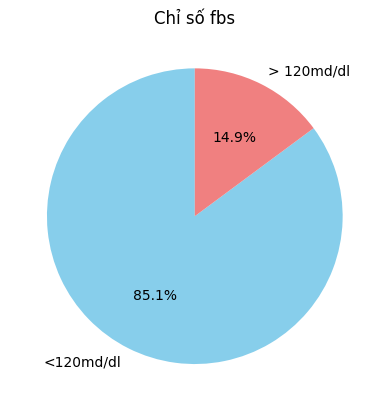

<Figure size 640x480 with 0 Axes>

In [151]:
# ĐO CHỈ SỐ ĐƯỜNG TRONG MÁU
import pandas as pd
import matplotlib.pyplot as plt

fbs_count = df['fbs'].value_counts()

fbs_labels = ['<120md/dl', '> 120md/dl']

# Vẽ biểu đồ tròn
plt.pie(fbs_count, labels=fbs_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Chỉ số fbs')
plt.show()
# ================================================

# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng fbs cho mỗi nhóm
fbs_count_output_1 = df_output_1['fbs'].value_counts()
fbs_count_output_0 = df_output_0['fbs'].value_counts()


# # Vẽ biểu đồ tròn cho output là 1
# plt.subplot(1, 2, 1)
# plt.pie(fbs_count_output_1, labels=fbs_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
# plt.title('fbs với Output 1')

# # Vẽ biểu đồ tròn cho output là 0
# plt.subplot(1, 2, 2)
# plt.pie(fbs_count_output_0, labels=fbs_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
# plt.title('fbs với Output 0')

plt.tight_layout()
plt.show()

In [118]:
print(df_copy["fbs"].value_counts(dropna=False))

fbs
0    258
1     45
Name: count, dtype: int64


In [153]:
##SO Sánh Độ bất thường đường huyết theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_fbs = sum(df_copy.fbs) / len(df_copy.fbs)
print("average of fbs: ", ave_fbs)

df_copy["average_fbs"] = ["high" if i>ave_fbs else "down" for i in df_copy.fbs]

df_copy.loc[:50,["age","average_age","average_fbs","fbs"]]

average of age:  54.366336633663366
average of fbs:  0.1485148514851485


,age,average_age,average_fbs,fbs
0,63,high,high,1
1,37,down,down,0
2,41,down,down,0
3,56,high,down,0
4,57,high,down,0
5,57,high,down,0
6,56,high,down,0
7,44,down,down,0
8,52,down,high,1
9,57,high,down,0


2.Điện tâm đồ (restecg-resting electrocardiographic results) (0;1;2)

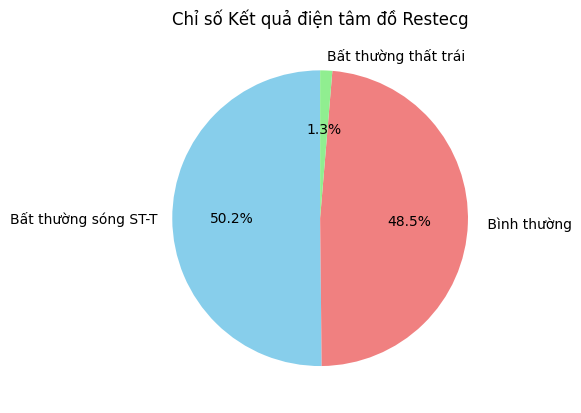

In [168]:

import pandas as pd
import matplotlib.pyplot as plt

restecg_count = df['restecg'].value_counts()

restecg_labels = ['Bất thường sóng ST-T',' Bình thường','Bất thường thất trái']

# Vẽ biểu đồ tròn
plt.pie(restecg_count, labels=restecg_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Chỉ số Kết quả điện tâm đồ Restecg')
plt.show()
# ================================================

# # Tách dữ liệu thành hai nhóm: output là 1 và output là 0
# df_output_1 = df[df['output'] == 1]
# df_output_0 = df[df['output'] == 0]

# # Tính số lượng cho mỗi nhóm
# restecg_count_output_1 = df_output_1['restecg'].value_counts()
# restecg_count_output_0 = df_output_0['restecg'].value_counts()


# # Vẽ biểu đồ tròn cho output là 1
# plt.subplot(1, 2, 1)
# plt.pie(restecg_count_output_1, labels=restecg_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
# plt.title('restecg với Output 1')

# # Vẽ biểu đồ tròn cho output là 0
# plt.subplot(1, 2, 2)
# plt.pie(restecg_count_output_0, labels=restecg_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
# plt.title('restecg với Output 0')

# plt.tight_layout()
# plt.show()

In [117]:
print(df_copy["restecg"].value_counts(dropna=False))

restecg
1    152
0    147
2      4
Name: count, dtype: int64


In [120]:
##SO Sánh ĐỘ BẤT THường trong Điện tâm đồ theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_restecg = sum(df_copy.restecg) / len(df_copy.restecg)
print("average of restecg: ", ave_restecg)

df_copy["average_restecg"] = ["high" if i>ave_restecg else "down" for i in df_copy.restecg]

df_copy.loc[:50,["age","average_age","average_restecg","restecg"]]

average of age:  54.366336633663366
average of restecg:  0.528052805280528


,age,average_age,average_restecg,restecg
0,63,high,down,0
1,37,down,high,1
2,41,down,down,0
3,56,high,high,1
4,57,high,high,1
5,57,high,high,1
6,56,high,down,0
7,44,down,high,1
8,52,down,high,1
9,57,high,high,1


3.Nhịp tim tối đa đạt được (thalach-maximum heart rate achieved) (từ 71 đến 202)

In [90]:
##SO Sánh nhịp tim tối đa theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_thalachh = sum(df_copy.thalachh) / len(df_copy.thalachh)
print("average of thalachh: ", ave_thalachh)

df_copy["average_thalachh"] = ["high" if i>ave_thalachh else "down" for i in df_copy.thalachh]

df_copy.loc[:50,["age","average_age","average_thalachh","thalachh"]]

average of age:  54.366336633663366
average of thalachh:  149.64686468646866


,age,average_age,average_thalachh,thalachh
0,63,high,high,150
1,37,down,high,187
2,41,down,high,172
3,56,high,high,178
4,57,high,high,163
5,57,high,down,148
6,56,high,high,153
7,44,down,high,173
8,52,down,high,162
9,57,high,high,174


In [149]:
# # frequency of data
# print(df_copy.thalachh.value_counts(dropna=False))
# df_copy.loc[:50,["age","average_age","average_thalachh","thalachh"]]
print(df_copy["average_thalachh"].value_counts(dropna=False))

average_thalachh
high    171
down    132
Name: count, dtype: int64


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(df, feature, bins, labels, output_column):
    df_output_1 = df[df[output_column] == 1]
    df_output_0 = df[df[output_column] == 0]

    # Tính số lượng cho mỗi nhóm
    count_1 = df_output_1[feature].value_counts().sort_index()
    count_0 = df_output_0[feature].value_counts().sort_index()

    # Loại bỏ giá trị không cần thiết (nếu có)
    if 'remove_value' in locals():
        count_1 = count_1.loc[count_1.index != remove_value]
        count_0 = count_0.loc[count_0.index != remove_value]

    # Vẽ biểu đồ cột cho feature với output là 1
    plt.subplot(1, 2, 1)
    plt.bar(count_1.index, count_1.values, color='skyblue')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 1')

    # Vẽ biểu đồ cột cho feature với output là 0
    plt.subplot(1, 2, 2)
    plt.bar(count_0.index, count_0.values, color='lightcoral')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 0')

    plt.tight_layout()
    plt.show()


thalachh_group
70-80       1
81-90       1
91-100      6
101-110    10
111-120    16
121-130    25
131-140    26
141-150    47
151-160    52
161-170    56
171-180    43
181-190    15
191-200     4
201-210     1
211-220     0
221-230     0
231-240     0
241-250     0
Name: count, dtype: int64


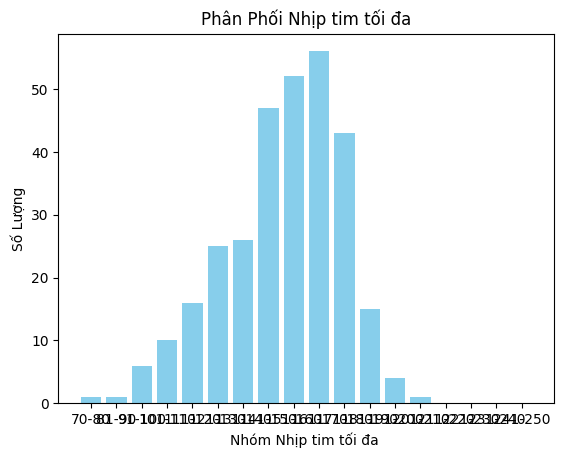

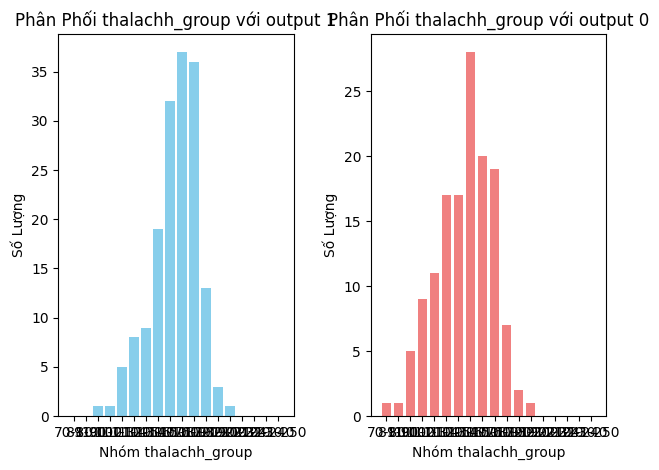

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


trtbps_count = df['thalachh'].value_counts()

# Chia khoảng và đếm số lượng
bins = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
labels = ['70-80','81-90','91-100', '101-110', '111-120', '121-130', '131-140', '141-150', '151-160', '161-170', '171-180', '181-190', '191-200', '201-210', '211-220', '221-230', '231-240', '241-250']
df['thalachh_group'] = pd.cut(df['thalachh'], bins=bins, labels=labels, right=False)
thalachh_group_count = df['thalachh_group'].value_counts().sort_index()

# Hiển thị kết quả
print(thalachh_group_count)
plt.bar(thalachh_group_count.index, thalachh_group_count.values, color='skyblue')
plt.xlabel('Nhóm Nhịp tim tối đa ')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Nhịp tim tối đa')
plt.show()
# =====================================================
plot_distribution(df, 'thalachh_group', bins, labels, 'output')

In [63]:
series = df_copy["thalachh"]
print(type(series))
print(series.head())
print("-----------")
data_frame = df_copy[["thalachh"]]
print(type(data_frame))
print(data_frame.head())

<class 'pandas.core.series.Series'>
0    150
1    187
2    172
3    178
4    163
Name: thalachh, dtype: int64
-----------
<class 'pandas.core.frame.DataFrame'>
   thalachh
0       150
1       187
2       172
3       178
4       163


In [170]:
print(df_copy["thalachh"].value_counts(dropna=False))

thalachh
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64


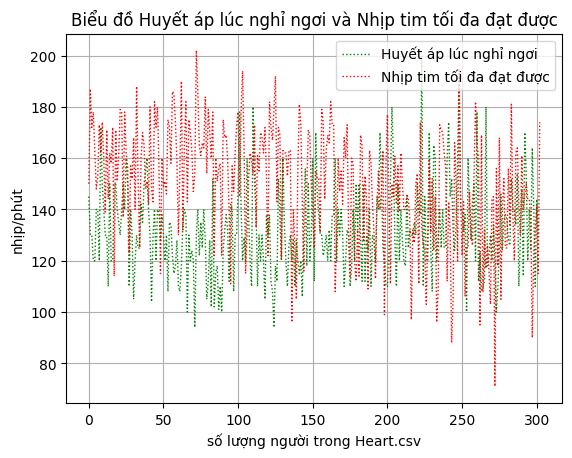

In [61]:
df_copy.trtbps.plot(kind="line", color="g", label="Huyết áp lúc nghỉ ngơi",linewidth=1,alpha = 1,grid = True,linestyle = ':')
df_copy.thalachh.plot(kind="line", color="r", label="Nhịp tim tối đa đạt được", linewidth=1,alpha = 1,grid = True,linestyle = ':')
plt.legend(loc='upper right')    
plt.xlabel('số lượng người trong Heart.csv')              
plt.ylabel('nhịp/phút')
plt.title('Biểu đồ Huyết áp lúc nghỉ ngơi và Nhịp tim tối đa đạt được')            
plt.show()

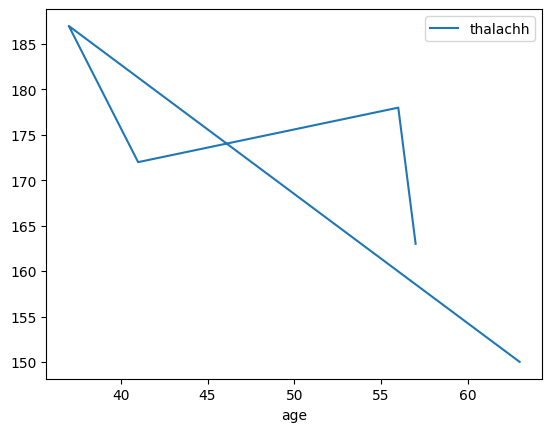

In [144]:
data1.plot(kind="line", x="age", y="thalachh")
plt.show()

4.Đau thắt ngực do gắng sức (exang-exercise induced angina (1 = yes; 0 = no))

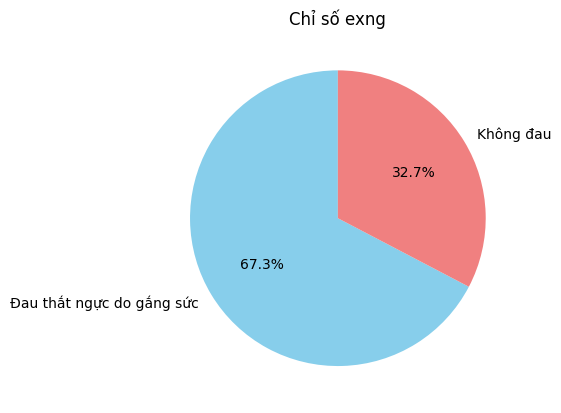

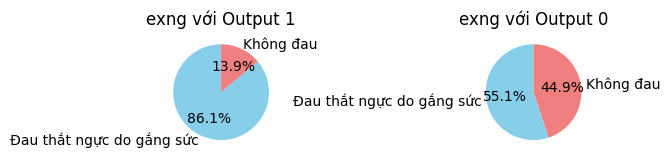

In [113]:
# ĐO CHỈ SỐ ĐƯỜNG TRONG MÁU
import pandas as pd
import matplotlib.pyplot as plt

exng_count = df['exng'].value_counts()

exng_labels = ['Đau thắt ngực do gắng sức', 'Không đau']

# Vẽ biểu đồ tròn
plt.pie(exng_count, labels=exng_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Chỉ số exng')
plt.show()
# ================================================

# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng exng cho mỗi nhóm
exng_count_output_1 = df_output_1['exng'].value_counts()
exng_count_output_0 = df_output_0['exng'].value_counts()


# Vẽ biểu đồ tròn cho output là 1
plt.subplot(1, 2, 1)
plt.pie(exng_count_output_1, labels=exng_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('exng với Output 1')

# Vẽ biểu đồ tròn cho output là 0
plt.subplot(1, 2, 2)
plt.pie(exng_count_output_0, labels=exng_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('exng với Output 0')

plt.tight_layout()
plt.show()

In [132]:
##SO Sánh Độ bất thường đau thắt ngực theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_exng = sum(df_copy.exng) / len(df_copy.exng)
print("average of exng: ", ave_exng)

df_copy["average_exng"] = ["high" if i>ave_exng else "down" for i in df_copy.exng]

df_copy.loc[:50,["age","average_age","average_exng","exng"]]


average of age:  54.366336633663366
average of exng:  0.32673267326732675


,age,average_age,average_exng,exng
0,63,high,down,0
1,37,down,down,0
2,41,down,down,0
3,56,high,down,0
4,57,high,high,1
5,57,high,down,0
6,56,high,down,0
7,44,down,down,0
8,52,down,down,0
9,57,high,down,0


In [125]:


print(df_copy["average_exng"].value_counts(dropna=False))
print(df_copy["average_age"].value_counts(dropna=False))

average_age
high    159
down    144
Name: count, dtype: int64
average_exng
down    204
high     99
Name: count, dtype: int64


In [171]:

print(df_copy["exng"].value_counts(dropna=False))

exng
0    204
1     99
Name: count, dtype: int64
